***

# ANÁLISE DE DADOS DA EDUCAÇÃO - ENEM

***

## SOBRE ESTE PROJETO

           O dataset são dados reais, disponíveis no site do INEP, contendo informações das provas
       do ENEM realizadas no estado de São Paulo. 
           O foco da análise (escolha pessoal) será a relação das notas obtidas e renda declarada no
       questionário socioeconomico, detalhando também, em alguns tópicos, se existe influência de gênero
       nas notas dos participantes.

### LÓGICA DE ANÁLISE

Para facilitar o entendimento da análise, este projeto foi desenvolvido por seções (descritas abaixo) e subseções.

Em todas as subseções você encontra por escrito quais foram as conclusões tiradas através da exploração dos dados e data visualization. Nos códigos também há o maior número de comentários possíveis, facilitando o entendimento do raciocínio no desenvolvimento deste notebook.

**1. Importação de libs e dataset**

**2. Exploração do dataset:**
     
     O objetivo é entender o tamanho do dataset, identificar se há dados faltantes, selecionar apenas as colunas que serão, a princípio, necessárias para a análise.
    
**3. Análise da qualidade dos dados:**

    Informaçoes incorretas (idade muito abaixo ou muito acima, dados não descritos no dicionário, etc)

**4. Análises estatísticas**

    Análise de informações gerais do dataset, sem focar no objeto de pesquisa, como:
    Distribuicão por idade, sexo, anos de conclusão do ensino médio, etc.
    
    obs: Primeira análise para entender melhor o dataset e os dados que serão trabalhados. A familiaridade com o dataset auxiliará na formação de hipóteses no próximo passo, este com as análises focadas no objeto de estudo: relação das notas obtidas x renda declarada
    
**5. Formulação das hipóteses**

    Foram desenvolvidas e analisadas 6 hipóteses com foco na renda e desempenho dos candidatos.
    Nesta seção, foi utilizado o diagrama MIND MAP para facilitar a construção das hipóteses.
    
**6. Análise: Condições socioeconômicas x nota obtida**

    Esta seção tem como objetivo analisar a correlação entre as condições socioeconômicas dos candidatos e suas respectivas notas na prova.
    
    
**7. Análises complementares**

    Esta seção analisa algumas variáveis que embora não estejam relacionadas diretamente a renda do candidato, aborda questões sociais e de inclusão.
    
**8. Seleção das variáveis**

    Com base nos insights obtidos e utilizando a técnica de importância, nesta seção, foram selecionadas as variáveis importantes para o modelo de Machine Learning
    
**9. Modelagem das features para ML**

    Nesta seção, analisamos se as features estão em formato correto para aplicação de Machine Learning.

**10. Machine Learning**

    Aplicado o modelo de Machine Learning K-Means. Com base na seleção das variáveis
    
**11. Conclusão do projeto**

    Considerações finais do projeto.

## IMPORTAÇÃO LIBS

In [ ]:
import pandas               as pd
import seaborn              as sns

import matplotlib
import matplotlib.pyplot    as plt
import numpy                as np

from datetime               import datetime
#from heatmap                import heatmap, corrplot
from sklearn.preprocessing  import OrdinalEncoder, StandardScaler
from sklearn.cluster        import KMeans
from IPython.display        import IFrame, Image


#from apyori              import apriori
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTAÇÃO DATASET

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/womakercode/MICRODADOS_ENEM_SAMPLE_43278.csv')

In [ ]:
# Visualizando os estados
df_raw['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
# Criando a variável df para dados somente de SP
df = df_raw[(df_raw['SG_UF_RESIDENCIA'] == 'SP')]

In [ ]:
#df.to_csv('SG_UF_RESIDENCIA_sp.csv', sep = ';')

In [ ]:
# Visualizando o dataframe com dados aleatórios
df.sample(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
27064,190002088588,2019,3510609,Carapicuíba,35,SP,17,F,1,1,...,B,A,A,D,A,A,E,B,C,B
124288,190005976277,2019,3550308,São Paulo,35,SP,23,F,1,1,...,B,A,A,B,A,A,B,A,A,A
95017,190004801174,2019,3550308,São Paulo,35,SP,17,M,1,5,...,B,A,B,C,A,A,E,B,B,B


## EXPLORAÇÃO DO DATASET

In [ ]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 136 colunas


In [ ]:
# Verificando as colunas existentes
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
# Verificando se somente SP está nos dataframe
df['SG_UF_RESIDENCIA'].value_counts()

SP    20264
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
# Selecionando as colunas que serão importantes para análise (muitas colunas com valores nulos)

columns = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO', 
          'CO_ESCOLA', 'TP_LOCALIZACAO_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL',
          'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'TP_ST_CONCLUSAO','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
           'NU_NOTA_REDACAO',
           'Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']


In [ ]:
# Sobrepondo a variavel df // Somente as colunas selecionadas para análise
df = df[columns]
df.sample(3)

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_LOCALIZACAO_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
32771,190002319249,17,M,1,1,0,2,0,35015155.0,2.0,...,B,A,A,B,B,A,B,A,A,B
15604,190001624320,18,F,1,1,1,1,0,NaN,NaN,...,B,A,B,C,B,B,E,B,E,B
57457,190003301696,17,F,1,1,0,2,0,35005368.0,1.0,...,B,A,A,B,A,A,D,B,B,B


In [ ]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 50 colunas


In [ ]:
# Verificando valores nulos
df.isna().sum()

NU_INSCRICAO              0
NU_IDADE                  0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
IN_TREINEIRO              0
CO_ESCOLA             14735
TP_LOCALIZACAO_ESC    14735
IN_GESTANTE               0
IN_LACTANTE               0
IN_NOME_SOCIAL            0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN             5659
TP_ST_CONCLUSAO           0
NU_NOTA_CH             4694
NU_NOTA_LC             4694
NU_NOTA_MT             5659
TP_LINGUA                 0
TP_STATUS_REDACAO      4694
NU_NOTA_REDACAO        4694
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                      0
Q011                

In [ ]:
# Contando a quantidade de NaN no dataframe
valores_nulos_escola = np.count_nonzero(~np.isnan(df['CO_ESCOLA']))
valores_nulos_escola

5529

    O código da escola e a localização possuem muitos dados faltantes, podendo distorcer a analises. 
    Como o foco desta análise é a desigualdade de renda (e alguns pontos de gênero), estes valores serão exluídos.
    Dados da nota vazios fazem sentido (alunos que faltaram, zeraram, etc.)

In [ ]:
# Excluindo as colunas CO_ESCOLA e TP_LOCALIZACAO_ESC
df.drop(['CO_ESCOLA', 'TP_LOCALIZACAO_ESC'], axis = 1, inplace = True)

In [ ]:
# Tamanho do dataset
df.shape

print('O dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset possui 20264 linhas e 48 colunas


In [ ]:
# Verificando o tipo de dado
df.dtypes

NU_INSCRICAO           int64
NU_IDADE               int64
TP_SEXO               object
TP_ESTADO_CIVIL        int64
TP_COR_RACA            int64
TP_ANO_CONCLUIU        int64
TP_ESCOLA              int64
IN_TREINEIRO           int64
IN_GESTANTE            int64
IN_LACTANTE            int64
IN_NOME_SOCIAL         int64
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NU_NOTA_CN           float64
TP_ST_CONCLUSAO        int64
NU_NOTA_CH           float64
NU_NOTA_LC           float64
NU_NOTA_MT           float64
TP_LINGUA              int64
TP_STATUS_REDACAO    float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q003                  object
Q004                  object
Q005                   int64
Q006                  object
Q007                  object
Q008                  object
Q009                  object
Q010                  object
Q011                  object
Q012          

        CONCLUSÃO
        
        Conforme variáveis selecionadas (colunas), pode-se classificá-las:
        
        Variáveis categóricas (características do aluno)
        - NU_IDADE
        - TP_ANO_CONCLUIU
        - TP_SEXO
        - TP_ESTADO_CIVIL
        - TP_COR_RACA
        - TP_ANO_CONCLUIU
        - IN_TREINEIRO
        - IN_GESTANTE
        - IN_LACTANTE
        - IN_NOME_SOCIAL
        - TP_ESCOLA (Tipo de escola - embora não seja caract. do aluno, será considerado)

        Variáveis Questionário Socioeconômico
        - Q001
        - Q002
        - Q003
        - Q004
        - Q005
        - Q006
        - Q007
        - Q008
        - Q009
        - Q010
        - Q011
        - Q012
        - Q013
        - Q014
        - Q015
        - Q016
        - Q017
        - Q018
        - Q019
        - Q020
        - Q021
        - Q022
        - Q023
        - Q024
        - Q025

        Variáveis referente a presença do aluno nas provas
        - TP_PRESENCA_CN
        - TP_PRESENCA_CH
        - TP_PRESENCA_LC
        - TP_PRESENCA_MT


        Variáveis referente a nota obtida
        - NU_NOTA_CN
        - NU_NOTA_CH
        - NU_NOTA_LC
        - NU_NOTA_MT
        
        Variável referente ao idioma escolhido para prova de língua estrangeira
        - TP_LINGUA
        
        Variável referente a situação da redação
        - TP_STATUS_REDACAO  
        
        Variável nota da redação
        - NU_NOTA_REDACAO
        
        
        (Este agrupamento de variáveis facilitará as posteriores análises)
        (NU_INSCRICAO == ID)

## ANÁLISE - QUALIDADE DOS DADOS

### IDADE

In [ ]:
# Analisando o aluno mais novo e o mais velho
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(df['NU_IDADE'].min(), df['NU_IDADE'].max() ))

O aluno mais novo tem 13 anos e o mais velho 73 anos


In [ ]:
#  Visualizando os alunos por idade (verificado que há idades incorretas)
df['NU_IDADE'].value_counts().sort_index()

13       1
14      10
15     297
16    1419
17    5594
18    3592
19    2072
20    1355
21     912
22     729
23     600
24     476
25     354
26     275
27     262
28     243
29     184
30     159
31     153
32     155
33     129
34     117
35     105
36     118
37      90
38      97
39      79
40      64
41      71
42      49
43      54
44      47
45      55
46      46
47      38
48      36
49      46
50      28
51      18
52      22
53      18
54       7
55      13
56      13
57      15
58       8
59       3
60       4
61      10
62       3
63       3
64       7
65       3
66       1
67       2
70       1
72       1
73       1
Name: NU_IDADE, dtype: int64

In [ ]:
# Considerando que para fazer o ENEM precisa estar cursando o ensino médio, o que inicia entre 14 - 15 anos, 
# foi considerando alunos a partir de 13 anos (considerando alguns alunos mais "adiantados" quanto a idade)
# Alunos com idade menor a 13 anos terão a idade substituída para a mediana

# Quantidade de alunos com idade menor que 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [ ]:
# Calculando a média e mediana dos alunos - Analisar se a substituicao faz sentido

print(df['NU_IDADE'].mean())
print(df['NU_IDADE'].median())

20.834188709040664
18.0


In [ ]:
# Verificando os alunos com idade menor 13
df[['NU_INSCRICAO', 'NU_IDADE']][df['NU_IDADE'] < 13]

,NU_INSCRICAO,NU_IDADE


In [ ]:
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [ ]:
# Substituindo os valores
df.loc[df.NU_IDADE < 13, 'NU_IDADE'] = 18

In [ ]:
# Consultando qt. candidatos com idade < 13
df['NU_IDADE'][df['NU_IDADE'] < 13].count()

0

In [ ]:
# Verificando se está correto I
df['NU_IDADE'].value_counts().sort_index()

13       1
14      10
15     297
16    1419
17    5594
18    3592
19    2072
20    1355
21     912
22     729
23     600
24     476
25     354
26     275
27     262
28     243
29     184
30     159
31     153
32     155
33     129
34     117
35     105
36     118
37      90
38      97
39      79
40      64
41      71
42      49
43      54
44      47
45      55
46      46
47      38
48      36
49      46
50      28
51      18
52      22
53      18
54       7
55      13
56      13
57      15
58       8
59       3
60       4
61      10
62       3
63       3
64       7
65       3
66       1
67       2
70       1
72       1
73       1
Name: NU_IDADE, dtype: int64

### DEMAIS VARIÁVEIS

In [ ]:
# Lista das colunas que serão analistadas

c = ['TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_GESTANTE',
     'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC', 'TP_PRESENCA_MT',
     'TP_LINGUA', 'Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
     'Q013', 'Q014', 'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']   

In [ ]:
# Função para analisar todas as colunas da variável c

def funcao_value_counts():
    for d in df[c]:
        print(df[d].value_counts().sort_index())
        
funcao_value_counts()

F    11929
M     8335
Name: TP_SEXO, dtype: int64
0      652
1    17983
2     1247
3      358
4       24
Name: TP_ESTADO_CIVIL, dtype: int64
0      310
1    11329
2     2064
3     6004
4      487
5       70
Name: TP_COR_RACA, dtype: int64
0     10049
1      2600
2      1748
3      1175
4       836
5       612
6       478
7       388
8       293
9       236
10      222
11      192
12      169
13     1266
Name: TP_ANO_CONCLUIU, dtype: int64
1    12967
2     5771
3     1526
Name: TP_ESCOLA, dtype: int64
0    17938
1     2326
Name: IN_TREINEIRO, dtype: int64
0    20261
1        3
Name: IN_GESTANTE, dtype: int64
0    20254
1       10
Name: IN_LACTANTE, dtype: int64
0    20263
1        1
Name: IN_NOME_SOCIAL, dtype: int64
0     5650
1    14605
2        9
Name: TP_PRESENCA_CN, dtype: int64
0     4670
1    15570
2       24
Name: TP_PRESENCA_CH, dtype: int64
0     4670
1    15570
2       24
Name: TP_PRESENCA_LC, dtype: int64
0     5650
1    14605
2        9
Name: TP_PRESENCA_MT, dtype: int64
0 

## ANÁLISES MACROS

### CARACTERÍSTICAS DOS CANDIDATOS

        Para ter uma visão geral dos dados, será tirada a média de todas as notas somente
        dos alunos presentes, sem considerar a nota de redação.
        
        

In [ ]:
# Visualização geral das informaçoes
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,20264.0,1.900037e+11,1365743.17,1.900012e+11,1.900024e+11,1.900037e+11,1.900047e+11,1.900061e+11
NU_IDADE,20264.0,2.083000e+01,6.77,1.300000e+01,1.700000e+01,1.800000e+01,2.100000e+01,7.300000e+01
TP_ESTADO_CIVIL,20264.0,1.070000e+00,0.41,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,20264.0,1.770000e+00,0.99,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
TP_ANO_CONCLUIU,20264.0,2.410000e+00,3.77,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01
TP_ESCOLA,20264.0,1.440000e+00,0.63,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
IN_TREINEIRO,20264.0,1.100000e-01,0.32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_GESTANTE,20264.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_LACTANTE,20264.0,0.000000e+00,0.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
IN_NOME_SOCIAL,20264.0,0.000000e+00,0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
# Selecionando as colunas de presenca e nota, agrupando pela presenca e somando a nota
df[['TP_PRESENCA_CN', 'NU_NOTA_CN']].groupby('TP_PRESENCA_CN').sum() #quem é eliminado, zera a prova

,NU_NOTA_CN
TP_PRESENCA_CN,
0,0.0
1,7267473.8
2,0.0


### PRESENÇA NAS PROVAS

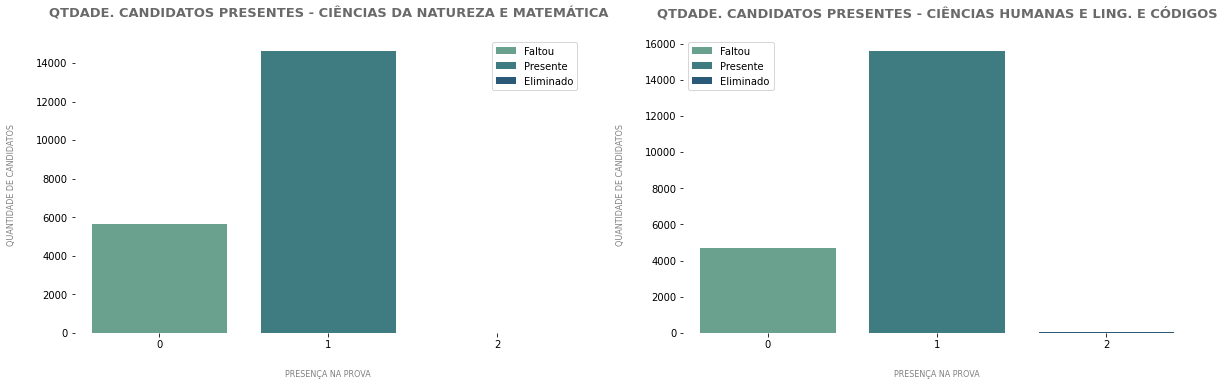

In [ ]:
plt.figure(figsize=(20, 25))
#plt.subplots_adjust(hspace = 0.40)

ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CH',
                   dodge = False)

ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=2, labels=['Faltou', 'Presente', 'Eliminado'])



#####

ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = df,
                    palette = 'crest', hue = 'TP_PRESENCA_CN',
                   dodge = False)

ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS DA NATUREZA E MATEMÁTICA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])


###################




    
    
**OBS**:

    1 - As provas ciencias da natureza e matematica são aplcadas no mesmo dia
    2 - As provas ciencias humanas e linguagens e codigos foram aplicadas no mesmo dia

    Conforme consultado no G1, as provas do ENEM  foram aplicadas na ordem:
    3 - Linguagens e codigos, ciencias humanas e redacao
    4 - C. Natureza e matematica
    
    
**Algumas Observações** 

    1 - Os candidatos tendem a faltar no primeiro dia de prova
    2 - Os candidatos costuam ser eliminados com maior frequencia no segundo dia de prova

### IDADE x SEXO

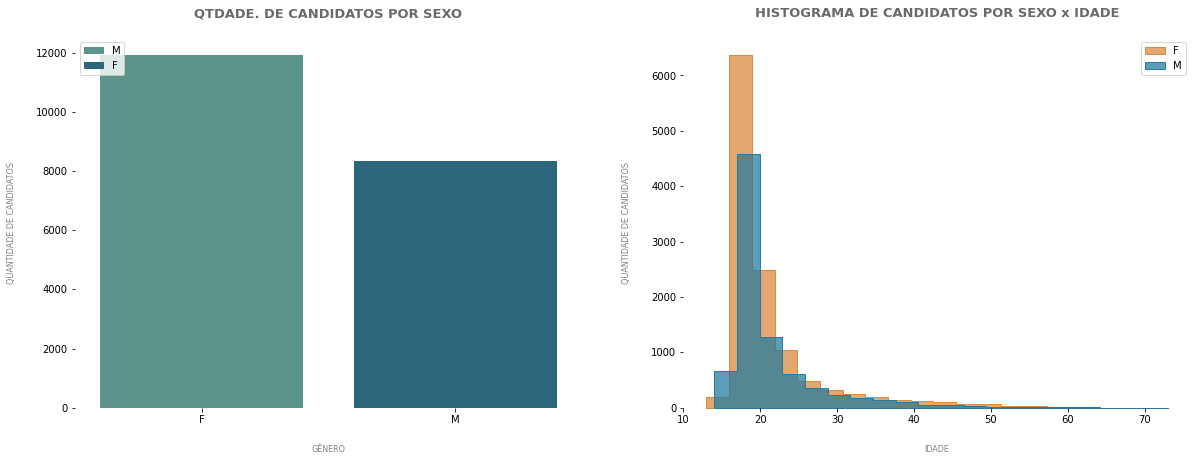

In [ ]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_SEXO', data = df,
                    palette = 'crest', hue = 'TP_SEXO', dodge = False
                   )
s1 = plt.title('QTDADE. DE CANDIDATOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['M', 'F'])


##############

s2 = plt.subplot(2, 2, 2)

sns.histplot(df[df['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df[df['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


    
**Algumas Conclusões** 

    1 - Há maior quantidade de mulheres realizando as provas
    2 - Há maior concentração de mulheres entre 20 - 25 anos quando comparado aos homens
    3 - APARENTEMENTE, há maior concentração de mulheres até 55 anos realizando a prova. Após essa idade,
    há maior quantidade de homens

### ENSINO MÉDIO

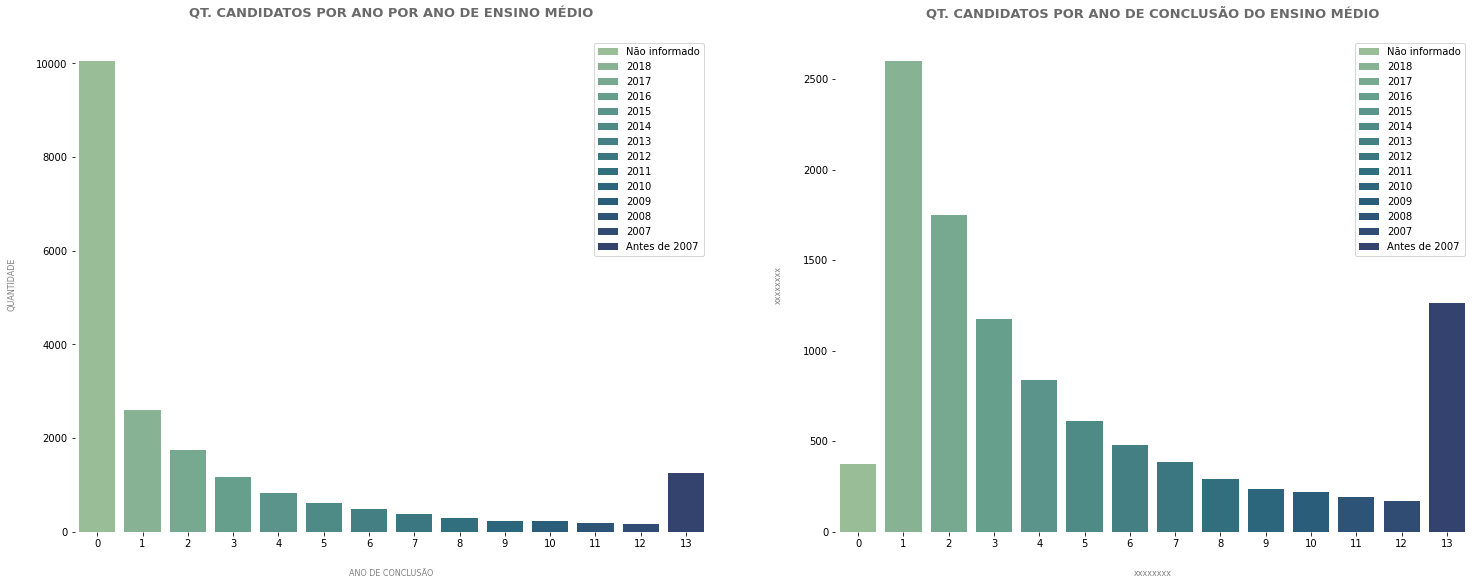

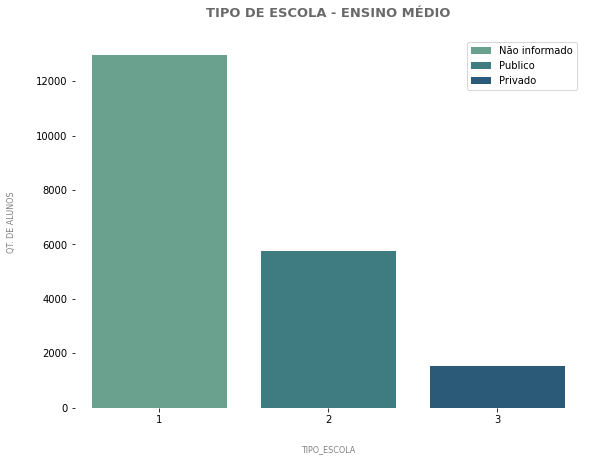

In [ ]:
plt.figure(figsize=(25, 20))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = df,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False
                   )
s1 = plt.title('QT. CANDIDATOS POR ANO POR ANO DE ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('ANO DE CONCLUSÃO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])

##################################################

concluido = df[df['TP_ST_CONCLUSAO'] == 1]
concluido


## Somente candidatos que concluíram o ensino médio

s2 = plt.subplot(2, 2, 2)

s2 = sns.countplot(x = 'TP_ANO_CONCLUIU', data = concluido,
                    palette = 'crest', hue = 'TP_ANO_CONCLUIU', dodge = False)


s2 = plt.title('QT. CANDIDATOS POR ANO DE CONCLUSÃO DO ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('xxxxxxxx', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=1, labels=['Não informado','2018','2017','2016','2015','2014','2013',
                               '2012','2011','2010','2009','2008','2007','Antes de 2007'])


##################################################

plt.figure(figsize=(20, 15))
s3 = plt.subplot(2, 2, 3)

s3 = sns.countplot(x = 'TP_ESCOLA', data = df,
                    palette = 'crest', hue = 'TP_ESCOLA', dodge = False
                   )
s3 = plt.title('TIPO DE ESCOLA - ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QT. DE ALUNOS', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Não informado', 'Publico', 'Privado'])


##################################################





### ESTADO CIVIL

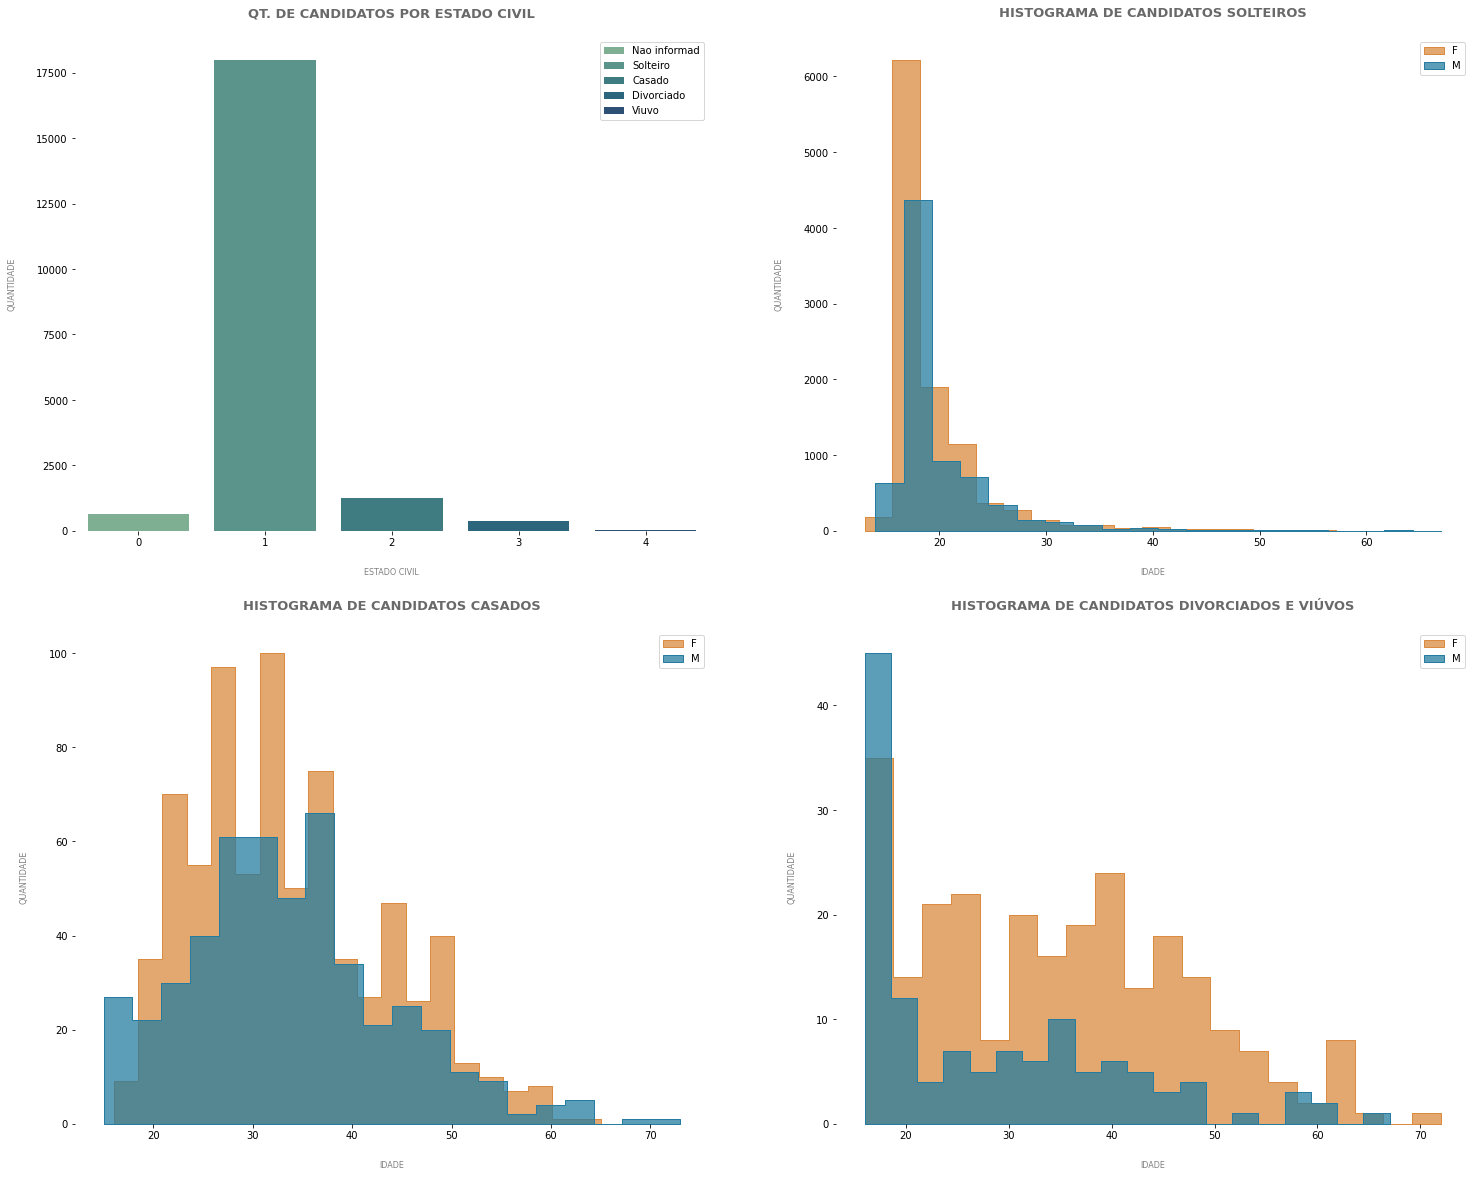

In [ ]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_ESTADO_CIVIL', data = df,
                    palette = 'crest', hue = 'TP_ESTADO_CIVIL', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR ESTADO CIVIL',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('ESTADO CIVIL', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao informad', 'Solteiro', 'Casado', 'Divorciado', 'Viuvo'])


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 1]

s2 = plt.subplot(2,2, 2)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS SOLTEIROS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[df['TP_ESTADO_CIVIL'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS CASADOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##########

estado_civil = df[(df['TP_ESTADO_CIVIL'] == 3) | (df['TP_ESTADO_CIVIL'] == 4)]

s2 = plt.subplot(2, 2, 4)

sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(estado_civil[estado_civil['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DIVORCIADOS E VIÚVOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

    
**Algumas Conclusões** 

    1 - A maior parte dos candidatos são solteiros
    2 - Candidatos casados se concentram mais após os ~22 anos
    3 - Candidatos divorciados e viúvos estão mais "espalhados" em relação a idade

###  RAÇA

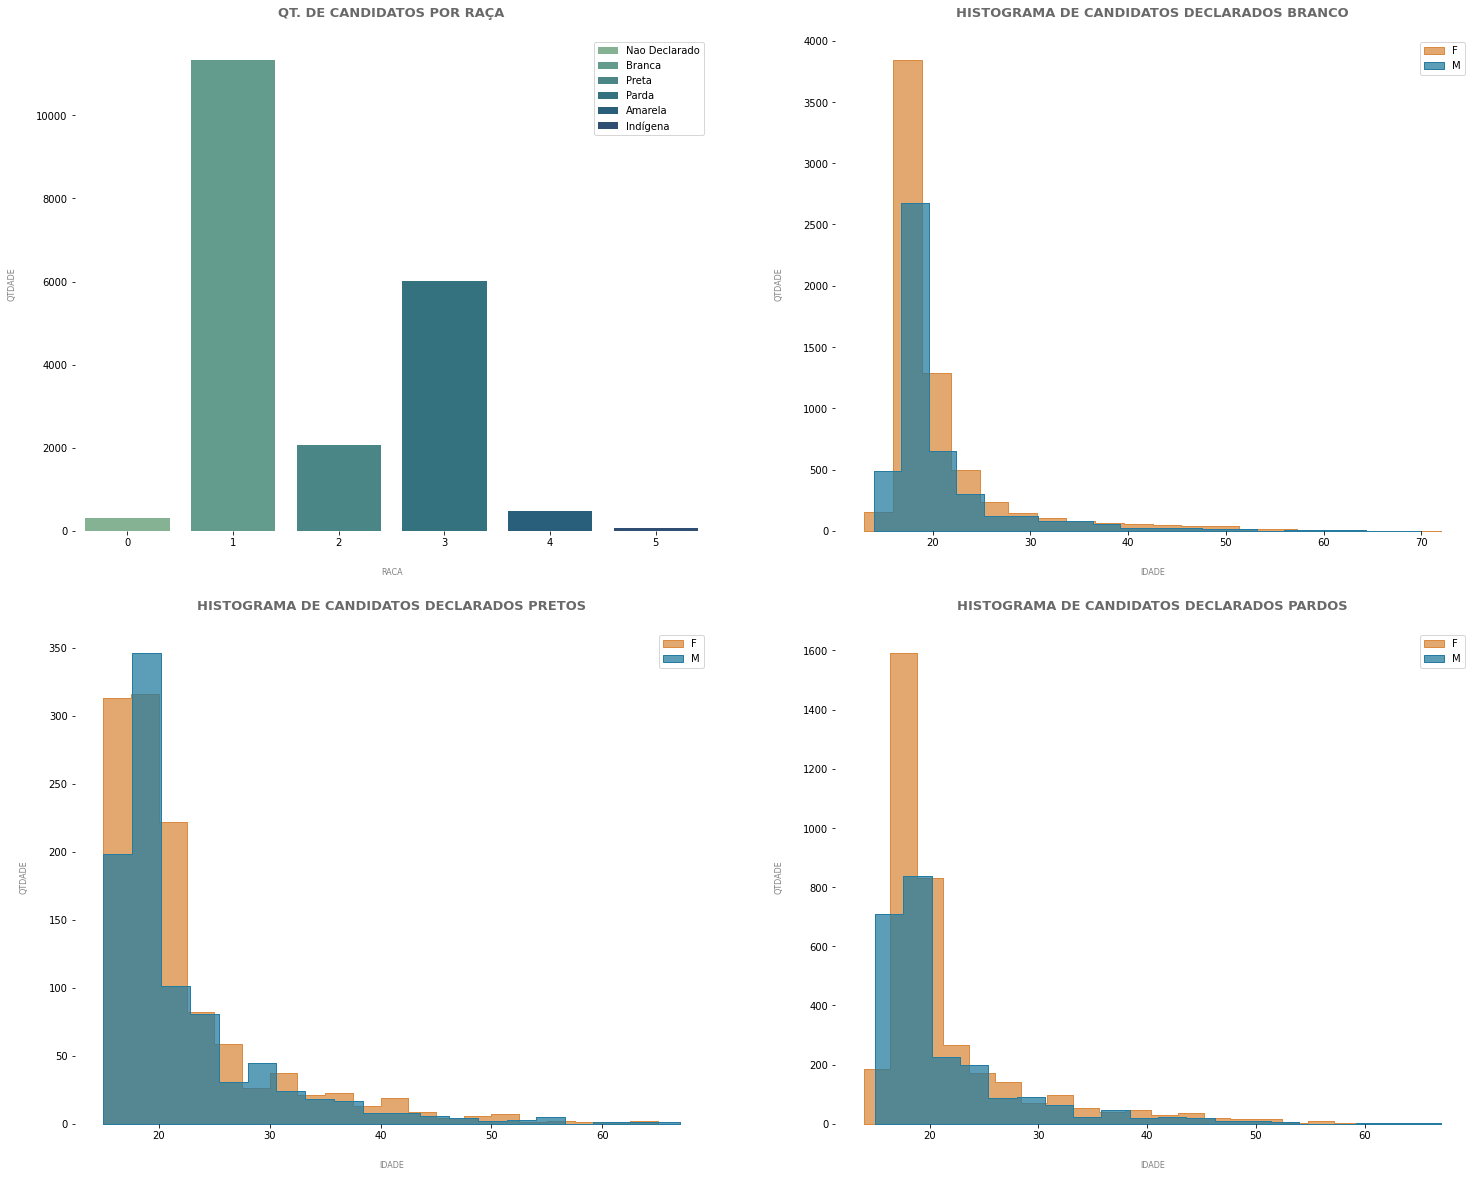

In [ ]:
plt.figure(figsize=(25, 20))

s2 = plt.subplot(2, 2, 1)
s3 = sns.countplot(x = 'TP_COR_RACA', data = df,
                    palette = 'crest', hue = 'TP_COR_RACA', dodge = False)


s3 = plt.title('QT. DE CANDIDATOS POR RAÇA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RACA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Nao Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

##########

raca = df[df['TP_COR_RACA'] == 1]

s2 = plt.subplot(2, 2, 2)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS BRANCO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()


##############

raca = df[df['TP_COR_RACA'] == 2]

s2 = plt.subplot(2, 2, 3)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PRETOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

##############

raca = df[df['TP_COR_RACA'] == 3]

s2 = plt.subplot(2, 2, 4)

sns.histplot(raca[raca['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(raca[raca['TP_SEXO'] == 'M']['NU_IDADE'],bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS DECLARADOS PARDOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend()

    
**Conclusões** 

    1 - A maior parte ds candidatos se autodeclaram brancos, seguidos por pardos, negros, amarelos e indígenas
    2 - A distribuição entre os sexos é bastante parecida, com exeção dos declarados pretos, com maior concentração de mulheres mais jovens
    3 - A distribuição dos candidatos declarados pretos também está levemente mais distribuída quando comparado aos declarados brancos e pardos
    4 - Os declarados brancos estão concentrados nas idades mais jovens

### NOTAS

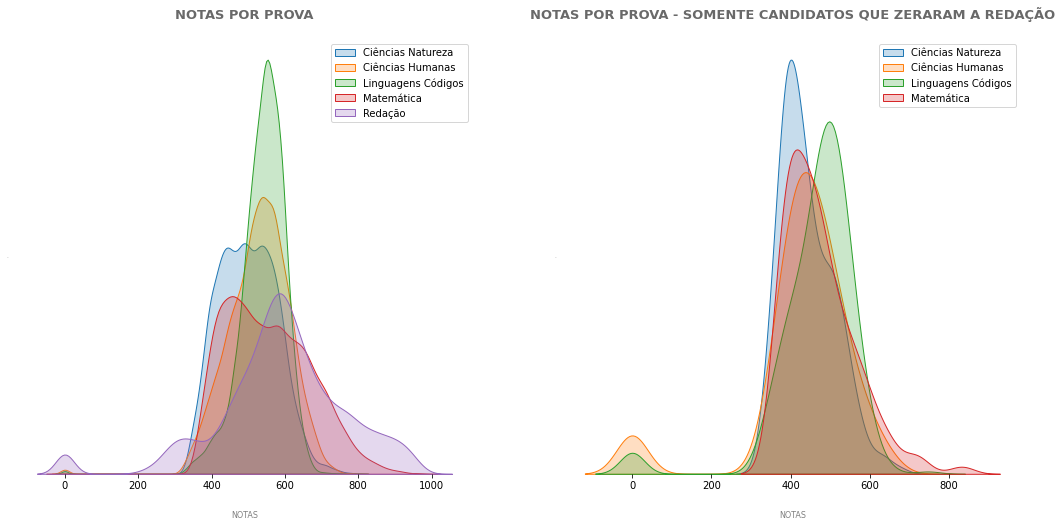

In [ ]:
plt.figure(figsize=(18,8))

ax = plt.subplot(1, 2, 1)

sns.kdeplot(df['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(df['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(df['NU_NOTA_MT'], label = 'Matemática', shade = True)
sns.kdeplot(df['NU_NOTA_REDACAO'], label = 'Redação', shade = True)


plt.title('NOTAS POR PROVA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax.tick_params(axis ='y', labelsize=0, length = 0)
ax.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()


##################################################


ax2 = plt.subplot(1, 2, 2)

sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_LC'], label = 'Linguagens Códigos', shade = True)
sns.kdeplot(df[df['NU_NOTA_REDACAO'] == 0]['NU_NOTA_MT'], label = 'Matemática', shade = True)


plt.title('NOTAS POR PROVA - SOMENTE CANDIDATOS QUE ZERARAM A REDAÇÃO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax2.tick_params(axis ='y', labelsize=0, length = 0)
ax2.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()

    
**Algumas Conclusões** 

    1 - As notas de redação são as mais "espalhadas"
    2 - Notas de linguagem e códigos possuem as notas mais concentradas
    3 - Matemática têm maior dispersão
    
    4 - Candidatos que zeram a redação têm distribuições semelhantes 


## FORMULAÇÃO DAS HIPÓTESES

A seção a seguir tem como objetivo responder algumas hipóteses formuladas. 
Foi elaborado o Mind Map para suportar a formulação das questões objetos desta análise.

**HIPÓTESES**

**1.** Candidatos do ensino público optam mais pelo idioma em espanhol

**2.** Há menor quantidade de treineiros no ensino público

**3.** Há maior quantidade de candidatas que solicitaram atendimento especial à gestantes e lactantes no ensino público

**4.** Quanto maior a renda, maior a nota obtida pelo candidato

**5.** Quanto menor a renda, menos abstenção de candidato

**6.** A educação dos pais tem impacto direto na nota dos candidatos, ou seja, quanto maior o grau de instrução dos pais, maior a nota dos candidatos


### **1.** CANDIDATOS DO ENSINO PÚBLICO OPTAM MAIS PELO IDIOMA ESPANHOL


   **CONCLUSÃO**

     Em escolas públicas, cerca de 34% dos candidatos optam pelo espanhol, enquanto na rede particular, é 17%

     ESCOLA PÚBLICA
     Ingles      65.97
     Espanhol    34.03

     ESCOLA PARTICULAR
     Ingles      82.97
     Espanhol    17.03


In [ ]:
# excluindo os candidatos que não responderam
tipo_escola = df[df['TP_ESCOLA'] != 1]

# Consultando se está correto
tipo_escola['TP_ESCOLA'].value_counts()

2    5771
3    1526
Name: TP_ESCOLA, dtype: int64

In [ ]:
# Definindo index do df
nome_escola = ['publica', 'particular']

# Definindo valores de análise
ing_publica = tipo_escola.TP_ESCOLA[(tipo_escola['TP_LINGUA'] == 0) & (tipo_escola['TP_ESCOLA']==2)].count()
ing_particular = tipo_escola.TP_ESCOLA[(tipo_escola['TP_LINGUA'] == 0) & (tipo_escola['TP_ESCOLA']==3)].count()
esp_publica = tipo_escola.TP_ESCOLA[(tipo_escola['TP_LINGUA'] == 1) & (tipo_escola['TP_ESCOLA']==2)].count()
esp_particular = tipo_escola.TP_ESCOLA[(tipo_escola['TP_LINGUA'] == 1) & (tipo_escola['TP_ESCOLA']==3)].count()


# Criando df para plotagem
tipo_escola_df = pd.DataFrame({
    'Ingles'   : [ing_publica, ing_particular],
    'Espanhol' : [esp_publica, esp_particular]
    },
    index = nome_escola
)

tipo_escola_df

,Ingles,Espanhol
publica,3782,1989
particular,1280,246


In [ ]:
total_publica = tipo_escola_df.loc['publica'].sum()
total_particular = tipo_escola_df.loc['particular'].sum()

print(total_publica)
print(total_particular)

5771
1526


In [ ]:
perc_escola_publica = ((tipo_escola_df.loc['publica'] / total_publica) * 100).round(2)
perc_escola_particular = ((tipo_escola_df.loc['particular'] / total_particular) * 100).round(2)

print(perc_escola_publica)
print(perc_escola_particular)

Ingles      65.53
Espanhol    34.47
Name: publica, dtype: float64
Ingles      83.88
Espanhol    16.12
Name: particular, dtype: float64


<Figure size 864x864 with 0 Axes>

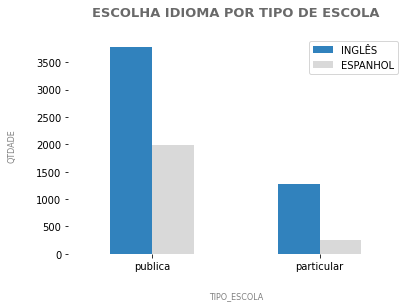

In [ ]:
plt.figure(figsize=(12, 12))

tipo_escola_df.plot.bar(rot = 0, colormap = 'tab20c')

plt.title('ESCOLHA IDIOMA POR TIPO DE ESCOLA',
               pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)
plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
plt.legend(labels=['INGLÊS', 'ESPANHOL'])

### **2** HÁ MENOR QUANTIDADE DE TREINEIROS NO ENSINO PÚBLICO

**CONCLUSÃO**          
          
          Não é possível investigar esta hipótese. Possivelmente, a informação de ensino médio 
          é respondida apenas por candidatos que já finalizaram esta formação.

In [ ]:
treineiro_escola_publica = df[(df['IN_TREINEIRO'] == 1) & (df['TP_ESCOLA'] == 2 )]
treineiro_escola_particular = df[(df['IN_TREINEIRO'] == 1) & (df['TP_ESCOLA'] == 3 )]
treineiro_nao_informado = df[(df['IN_TREINEIRO'] == 1) & (df['TP_ESCOLA'] == 1 )]

In [ ]:
df['IN_TREINEIRO'].value_counts()

0    17938
1     2326
Name: IN_TREINEIRO, dtype: int64

In [ ]:
df['TP_ESCOLA'].value_counts()

1    12967
2     5771
3     1526
Name: TP_ESCOLA, dtype: int64

In [ ]:
treineiro_nao_informado['TP_ESCOLA'].value_counts()

1    2326
Name: TP_ESCOLA, dtype: int64

### **4.** QUANTO MAIOR A RENDA, MAIOR A NOTA OBTIDA PELO CANDIDATO


 **CONCLUSÕES**
 
     A renda do candidato está diretamente ligada ao seu desempenho.
     A medida que a renda dos candidatos aumenta, maior seu desempenho.
     
     Há comentários no notebook durante esta seção

In [ ]:
# Selecionando as notas de todas as provas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

In [ ]:
# Somando as notas das provas
df['NOTA_TOTAL'] = df[provas].sum(axis=1)

In [ ]:
# Consultando
df['NOTA_TOTAL'].head()

6211     2405.4
7040     3427.9
8423        0.0
12953    3604.8
13997    2418.5
Name: NOTA_TOTAL, dtype: float64

In [ ]:
# Selecionando as colunas com as presencas
presencas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC' ,'TP_PRESENCA_MT']

# Considerando que a presenca é 0: faltou, 1: presente e 2: eliminado, será considerado somente os alunos
# com o total de 4 presencas, ou seja, que estavam presentes nos dois dias

# Definindo a coluna
df['PRESENCA'] = df[presencas].sum(axis=1)

# Consultando
df['PRESENCA'].value_counts()

4    14606
0     4647
2     1002
6        9
Name: PRESENCA, dtype: int64

In [ ]:
# Criando uma variável somente com os dados necessarios
nota_e_renda = df[['NOTA_TOTAL', 'Q006']][(df['PRESENCA'] == 4)]

In [ ]:
nota_e_renda['Q006'].value_counts()

C    2972
E    1834
D    1684
G    1486
B    1155
H     999
F     971
I     763
J     402
Q     360
N     352
K     298
O     289
P     274
A     263
L     257
M     247
Name: Q006, dtype: int64

     As notas obtidas pelos candidatos segue uma normal, com a sua mediana bem definida (entre 2.5)
     Já a renda possui distribuição assimétrica, concentração à esquerda e consequemente, calda à direita.
     Nota-se que a maior parte dos candidatos possuem renda até 2.5 reais.

In [ ]:
## "Traduzinho" as categorias de renda em valores

renda = {
    'A' : 0,
    'B' : 998,
    'C' : 998,
    'D' : 1497,
    'E' : 1996,
    'F' : 2495,
    'G' : 2994,
    'H' : 3992,
    'I' : 4990,
    'J' : 5988,
    'K' : 6986,
    'L' : 7984,
    'M' : 8982,
    'N' : 9980,
    'O' : 11976,
    'P' : 14970,
    'Q' : 19960
}

#transformando o código da renda em valores e inserindo em um dataframe
renda_dic = pd.DataFrame(renda.items(), columns=['Q006', 'renda'])

In [ ]:
# Fazendo um merge para encontrar o valor de cada categoria de renda
nota_e_renda = pd.merge(nota_e_renda, renda_dic, how = 'left', on = 'Q006')

In [ ]:
# Visualizando o dataset
nota_e_renda

,NOTA_TOTAL,Q006,renda
0,2405.4,B,998
1,3427.9,A,0
2,3604.8,J,5988
3,2418.5,B,998
4,2726.3,E,1996
...,...,...,...
14601,3344.6,G,2994
14602,2216.2,C,998
14603,2410.2,B,998
14604,2237.7,C,998


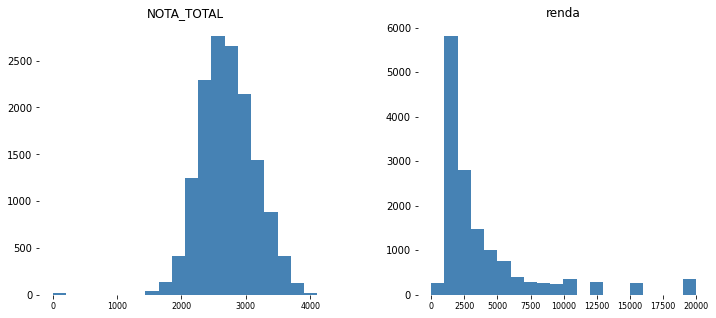

In [ ]:
nota_e_renda.hist(bins = 20, color = 'steelblue',
                      grid = False,
                      figsize=(12,5),
                      xlabelsize=8)


sns.despine(bottom = True, left=True)


    A distribuição abaixo demonstra as notas obtidas pelos candidatos de acordo com suas respectivas rendas.
    Devido a grande quantidade de grupos de renda (17 grupos), foram selecionados algumas categorias para 
    visualizar se há aspectos que diferenciem as notas conforme a renda aumenta.
    
    Nota-se que as distribuiçoes tendem à normalidade, porém, a medida que a renda aumenta, a forma da
    distribuição se desloca para a dieita.

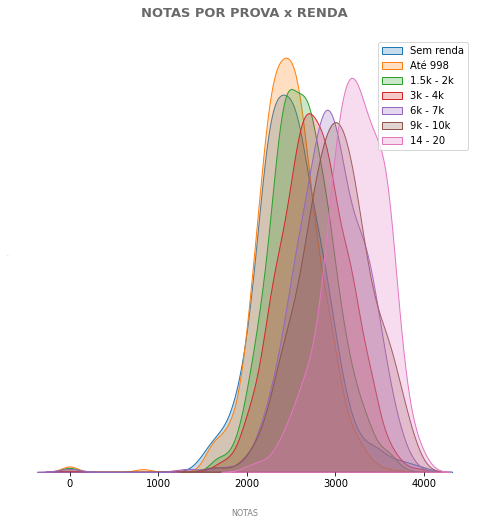

In [ ]:
plt.figure(figsize=(18,8))
ax2 = plt.subplot(1, 2, 1)

sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'A']['NOTA_TOTAL'], label = 'Sem renda', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'B']['NOTA_TOTAL'], label = 'Até 998', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'D']['NOTA_TOTAL'], label = '1.5k - 2k', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'G']['NOTA_TOTAL'], label = '3k - 4k', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'J']['NOTA_TOTAL'], label = '6k - 7k', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'M']['NOTA_TOTAL'], label = '9k - 10k', shade = True)
sns.kdeplot(nota_e_renda[nota_e_renda['Q006'] == 'Q']['NOTA_TOTAL'], label = '14 - 20', shade = True)


plt.title('NOTAS POR PROVA x RENDA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax2.tick_params(axis ='y', labelsize=0, length = 0)
ax2.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend()


######


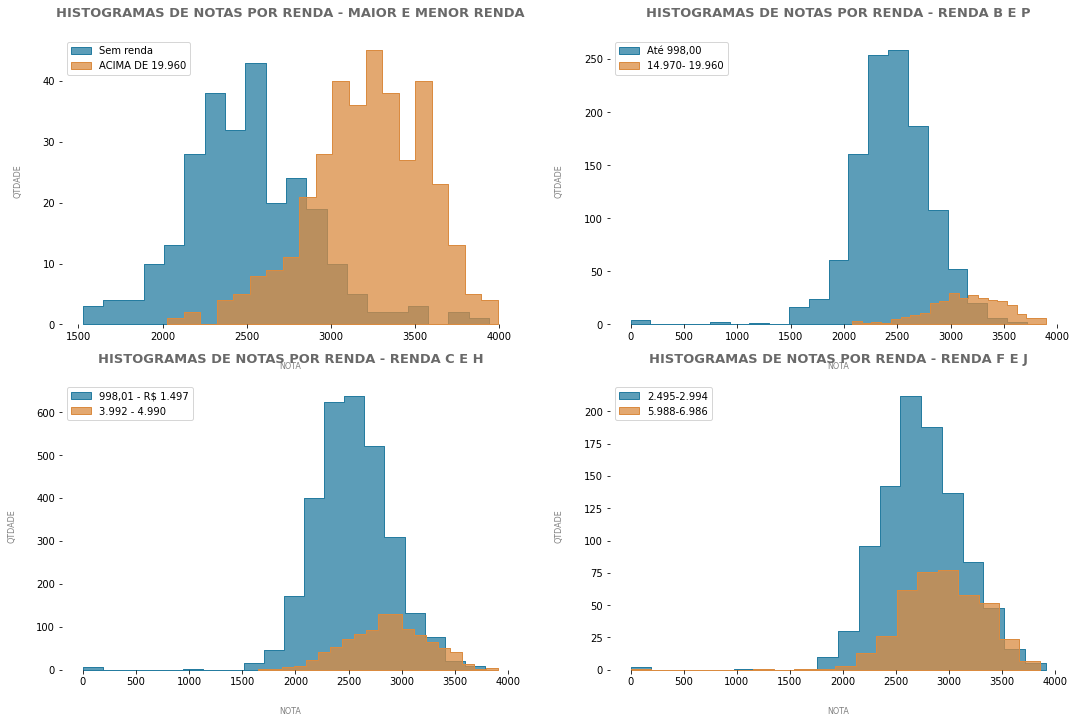

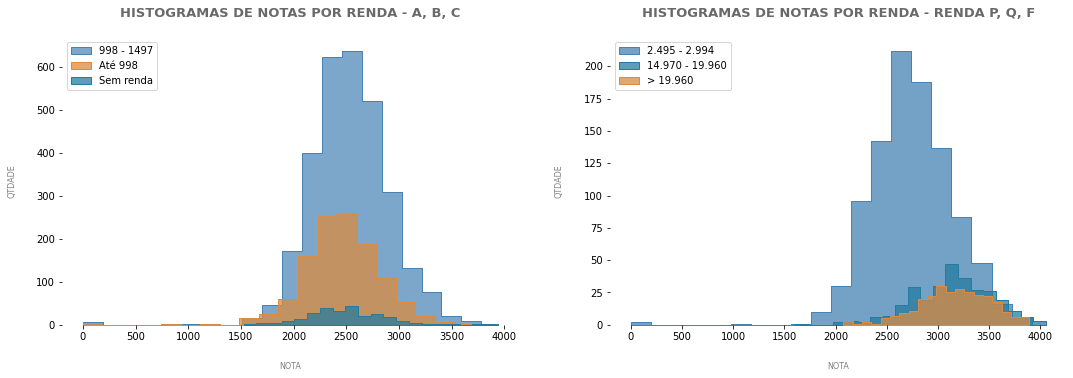

In [ ]:
plt.figure(figsize=(18,18))
ax2 = plt.subplot(3, 2, 1)

median = nota_e_renda.groupby('Q006').median()
media = nota_e_renda.groupby('Q006').mean()
std = nota_e_renda.groupby('Q006').std()

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'A']['NOTA_TOTAL'],bins = 20, label = 'Sem renda',
             element = 'step',
             color = '#257ca0')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'Q']['NOTA_TOTAL'],bins = 20, label = 'ACIMA DE 19.960',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - MAIOR E MENOR RENDA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)




#######

ax2 = plt.subplot(3, 2, 2)

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'B']['NOTA_TOTAL'],bins = 20, label = 'Até 998,00',
             element = 'step',
             color = '#257ca0')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'P']['NOTA_TOTAL'],bins = 20, label = '14.970- 19.960',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - RENDA B E P',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)

#######

ax2 = plt.subplot(3, 2, 3)

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'C']['NOTA_TOTAL'],bins = 20, label = '998,01 - R$ 1.497',
             element = 'step',
             color = '#257ca0')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'H']['NOTA_TOTAL'],bins = 20, label = '3.992 - 4.990',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - RENDA C E H',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)


#######

ax2 = plt.subplot(3, 2, 4)

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'F']['NOTA_TOTAL'],bins = 20, label = '2.495-2.994',
             element = 'step',
             color = '#257ca0')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'J']['NOTA_TOTAL'],bins = 20, label = '5.988-6.986',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - RENDA F E J',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)

#### JJJJJ





plt.figure(figsize=(18,18))
ax2 = plt.subplot(3, 2, 1)



sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'C']['NOTA_TOTAL'],bins = 20, 
             label = '998 - 1497',
             element = 'step', alpha = 0.7,
             color = 'steelblue')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'B']['NOTA_TOTAL'],bins = 20,
             label = 'Até 998',
             element = 'step',
             color = '#da8b40')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'A']['NOTA_TOTAL'],bins = 20, 
             label = 'Sem renda',
             element = 'step',
             color = '#257ca0')




s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - A, B, C',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)




#######

ax2 = plt.subplot(3, 2, 2)

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'F']['NOTA_TOTAL'],bins = 20, label = '2.495 - 2.994',
             element = 'step',
             color = 'steelblue')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'O']['NOTA_TOTAL'], bins = 20,label = '14.970 - 19.960',
             element = 'step',
             color = '#257ca0')

sns.histplot(nota_e_renda[nota_e_renda['Q006'] == 'P']['NOTA_TOTAL'],bins = 20, label = '> 19.960',
             element = 'step',
             color = '#da8b40')





s2 = plt.title('HISTOGRAMAS DE NOTAS POR RENDA - RENDA P, Q, F',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)

#######




### **5.** QUANTO MENOR A RENDA, MAIOR A ABSTENÇÃO DO CANDIDATO


 **CONCLUSÕES**
 
     A maior quantidade de candidatos ausentes se concentram nas classes B - F.
     Candidatos da classe A (sem renda) têm presença (em quantidade absoluta) semelhantes aos
     candidatos com renda média de 5mil.
     
     Há um leve aumento de candidatos ausentes na classe Q (de maior renda)

In [ ]:
# Verificando o dataframe (selecionando as variaveis de presenta e contando o que for menor que 4)
df[presencas][df['PRESENCA'] < 4]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
8423,0,0,0,0
14249,0,0,0,0
14264,0,0,0,0
14269,0,0,0,0
14271,0,0,0,0
...,...,...,...,...
127226,0,0,0,0
127227,0,0,0,0
127228,0,0,0,0
127280,0,0,0,0


In [ ]:
# Criando as variaveis de presentes e não presentes
faltantes = df[df['PRESENCA'] < 4]
n_faltantes = df[df['PRESENCA'] == 4]

In [ ]:
# Transformando a variavel em um dataframe
faltantes_por_renda = pd.DataFrame(faltantes['Q006'].value_counts())

# Resetando o index
faltantes_por_renda.reset_index(inplace = True)

# Renomeando as colunas
faltantes_por_renda.rename(columns={'index': 'Q006',
                                   'Q006' : 'qt'}, inplace = True)

# Visualizando o dataframe ajustado
faltantes_por_renda

,Q006,qt
0,C,1662
1,B,774
2,E,764
3,D,754
4,G,418
5,F,372
6,H,188
7,A,152
8,I,138
9,J,84


In [ ]:
# Merge para identificar os valores em cada dado categorico
faltantes_por_renda = pd.merge(faltantes_por_renda, renda_dic, how = 'left', on='Q006')

faltantes_por_renda

,Q006,qt,renda
0,C,1662,998
1,B,774,998
2,E,764,1996
3,D,754,1497
4,G,418,2994
5,F,372,2495
6,H,188,3992
7,A,152,0
8,I,138,4990
9,J,84,5988


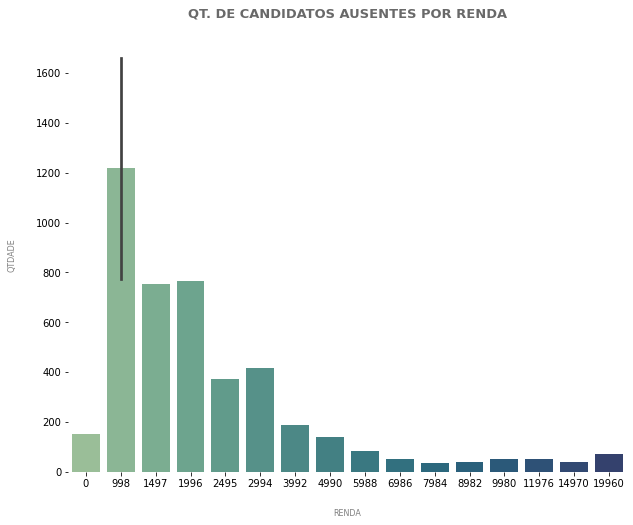

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'renda', y = 'qt', data = faltantes_por_renda, palette = 'crest')


s3 = plt.title('QT. DE CANDIDATOS AUSENTES POR RENDA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)



### **6.** A EDUCAÇÃO DOS PAIS TEM IMPACTO DIRETO NA NOTA DOS CANDIDATOS, OU SEJA, QUANTO MAIOR O GRAU DE INSTRUÇÃO DOS PAIS, MAIOR A NOTA DOS CANDIDATOS


**Conclusões**

    A instrução dos pai têm impacto direto na dos candidatos.
    A mediana é cada vez maior quando comparado com o maior grau de instrução dos pais.
    
    Ainda há significante diferença quando comprado o grau de instrução dos pais que terminaram o ensino médio com os que possuem pós-graduação. 
    
    A diferença é menor do grupo de pais com ensino superior e pós graduação
    
   

In [ ]:
# criando uma variavel com a instrucao dos pais e a nota

instrucao_pai = df[['Q001', 'NOTA_TOTAL']]
instrucao_mae = df[['Q002', 'NOTA_TOTAL']]



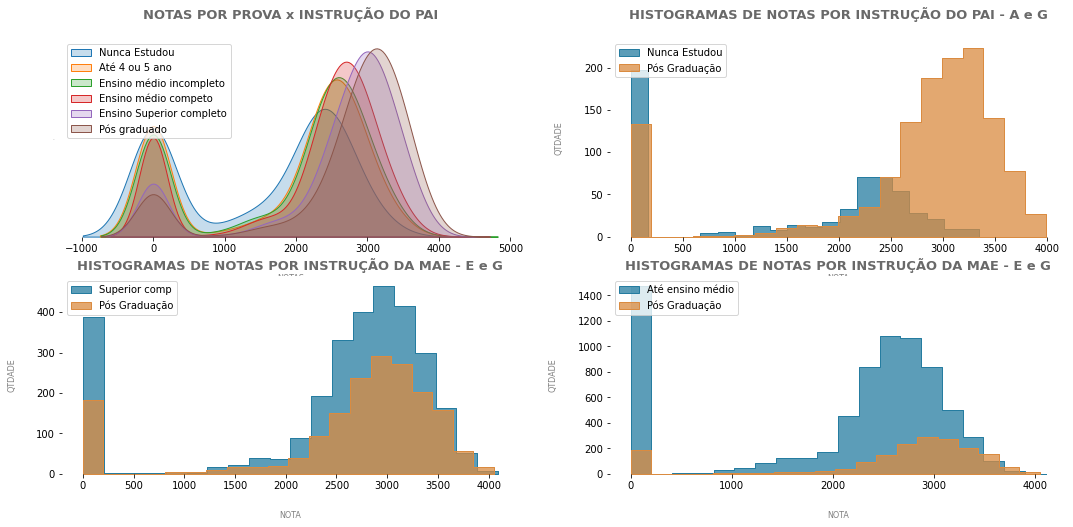

In [ ]:
plt.figure(figsize=(18,8))
ax2 = plt.subplot(2, 2, 1)

sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'A']['NOTA_TOTAL'], label = 'Nunca Estudou', shade = True)
sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'C']['NOTA_TOTAL'], label = 'Até 4 ou 5 ano', shade = True)
sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'D']['NOTA_TOTAL'], label = 'Ensino médio incompleto', shade = True)
sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'E']['NOTA_TOTAL'], label = 'Ensino médio competo', shade = True)
sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'F']['NOTA_TOTAL'], label = 'Ensino Superior completo', shade = True)
sns.kdeplot(instrucao_pai[instrucao_pai['Q001'] == 'G']['NOTA_TOTAL'], label = 'Pós graduado', shade = True)


plt.title('NOTAS POR PROVA x INSTRUÇÃO DO PAI',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)


ax2.tick_params(axis ='y', labelsize=0, length = 0)
ax2.set_yticklabels([])
plt.ylabel([], fontsize =0)

ax = plt.legend(loc=2)




############


ax2 = plt.subplot(2, 2, 2)

sns.histplot(instrucao_pai[instrucao_pai['Q001'] == 'A']['NOTA_TOTAL'],bins = 20, label = 'Nunca Estudou',
             element = 'step',
             color = '#257ca0')

sns.histplot(instrucao_pai[instrucao_pai['Q001'] == 'G']['NOTA_TOTAL'],bins = 20, label = 'Pós Graduação',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR INSTRUÇÃO DO PAI - A e G',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)


##########


ax2 = plt.subplot(2, 2, 3)

sns.histplot(instrucao_mae[instrucao_mae['Q002'] == 'F']['NOTA_TOTAL'],bins = 20, label = 'Superior comp',
             element = 'step',
             color = '#257ca0')

sns.histplot(instrucao_mae[instrucao_mae['Q002'] == 'G']['NOTA_TOTAL'],bins = 20, label = 'Pós Graduação',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR INSTRUÇÃO DA MAE - E e G',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)


##########

ax2 = plt.subplot(2, 2, 4)

sns.histplot(instrucao_mae[instrucao_mae['Q002'] == 'E']['NOTA_TOTAL'],bins = 20, label = 'Até ensino médio',
             element = 'step',
             color = '#257ca0')

sns.histplot(instrucao_mae[instrucao_mae['Q002'] == 'G']['NOTA_TOTAL'],bins = 20, label = 'Pós Graduação',
             element = 'step',
             color = '#da8b40')

s2 = plt.title('HISTOGRAMAS DE NOTAS POR INSTRUÇÃO DA MAE - E e G',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('NOTA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=2)


## ANÁLISE SOCIOECONOMICO x NOTA

### CORRELAÇÃO

**Conclusões**

      Como já identificado nas análises anteriores, a renda do candidato tem maior influência no desempenho dos alunos.
      Computador, internet, instrução do pai e da mãe são os que possuem maior correlação com a nota dos candidatos.
      Há algumas divergencias devido aos alunos que não declararam algumas variáveis, trazendo o número para 0, porém, é possível notar que estado civil, raça e tipo de escola também influenciam (embora o tipo de escola altere significamente os dados, pois a maior parte dos alunos de escola particular não declaram o tipo de escola, uma vez que este dado é somente para alunos que já concluíram o ensino médio - quase a totalidade de alunos do ensino particular prestam a prova com o ensino médio en andamento)

***     
**A partir das análises e hipóteses geradas no item anterior, as demais variáveis serão analisadas, tendo como principal
objeto de pesquisa a desigualdade social como impactante no desempenho dos candidatos (situação
comprovada nas hipóteses acima)**

****

#### VARIÁVEIS NUMÉRICAS

In [ ]:
questionario=['Q001', 'Q002', 'Q006', 'Q024','Q025', 'NU_NOTA_LC',
              'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO',
              'NOTA_TOTAL', 'PRESENCA', 'TP_COR_RACA']

In [ ]:
df1 = df[df[questionario]['PRESENCA'] == 4]

In [ ]:
# Matriz de correlação
df1.corr().round(2)

,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,IN_NOME_SOCIAL,...,TP_ST_CONCLUSAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005,NOTA_TOTAL,PRESENCA
NU_INSCRICAO,1.00,0.05,0.02,-0.04,0.06,-0.11,0.15,NaN,-0.00,-0.01,...,0.05,-0.03,-0.02,0.03,-0.01,0.03,-0.06,-0.02,-0.03,NaN
NU_IDADE,0.05,1.00,0.41,0.07,0.80,-0.30,-0.25,NaN,0.02,-0.00,...,-0.47,-0.04,-0.10,-0.15,0.15,0.06,-0.16,-0.14,-0.14,NaN
TP_ESTADO_CIVIL,0.02,0.41,1.00,0.03,0.29,-0.10,-0.06,NaN,0.01,-0.02,...,-0.13,-0.05,-0.08,-0.08,0.07,0.03,-0.08,-0.05,-0.09,NaN
TP_COR_RACA,-0.04,0.07,0.03,1.00,0.07,-0.06,-0.11,NaN,0.02,0.01,...,-0.11,-0.15,-0.15,-0.16,0.10,0.01,-0.12,0.06,-0.17,NaN
TP_ANO_CONCLUIU,0.06,0.80,0.29,0.07,1.00,-0.43,-0.23,NaN,0.03,-0.00,...,-0.55,0.03,-0.02,-0.08,0.13,0.03,-0.09,-0.15,-0.05,NaN
TP_ESCOLA,-0.11,-0.30,-0.10,-0.06,-0.43,1.00,-0.30,NaN,-0.02,0.02,...,0.33,0.01,0.02,0.08,-0.06,-0.01,0.06,0.05,0.05,NaN
IN_TREINEIRO,0.15,-0.25,-0.06,-0.11,-0.23,-0.30,1.00,NaN,-0.01,-0.00,...,0.74,0.04,0.06,0.10,-0.10,-0.01,0.03,0.01,0.07,NaN
IN_GESTANTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IN_LACTANTE,-0.00,0.02,0.01,0.02,0.03,-0.02,-0.01,NaN,1.00,-0.00,...,-0.02,-0.01,-0.01,-0.02,0.01,-0.00,-0.02,0.02,-0.02,NaN
IN_NOME_SOCIAL,-0.01,-0.00,-0.02,0.01,-0.00,0.02,-0.00,NaN,-0.00,1.00,...,0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.01,-0.01,-0.00,NaN


#### VARIÁVEIS CATEGÓRICAS x NUMÉRICAS

In [ ]:
## Transformando as variaveis do questionario em numericas
df1[questionario].head(3)

,Q001,Q002,Q006,Q024,Q025,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NOTA_TOTAL,PRESENCA,TP_COR_RACA
6211,E,C,B,A,B,502.4,448.1,511.3,423.6,520.0,2405.4,4,3
7040,E,E,A,B,B,614.7,695.9,621.9,575.4,920.0,3427.9,4,3
12953,E,F,J,B,B,701.1,680.1,745.9,637.7,840.0,3604.8,4,1


In [ ]:
#criando o dicionario com as "traducoes"

## Q001 e Q002
Q001 = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8
}


# Q006
Q006 = {
    'A' : 0,
    'B' : 998,
    'C' : 998,
    'D' : 1497,
    'E' : 1996,
    'F' : 2495,
    'G' : 2994,
    'H' : 3992,
    'I' : 4990,
    'J' : 5988,
    'K' : 6986,
    'L' : 7984,
    'M' : 8982,
    'N' : 9980,
    'O' : 11976,
    'P' : 14970,
    'Q' : 19960
}


# Q024
Q024 = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4
}

# Q025
Q025 = {
    'A' : 1,
    'B' : 2
}

# Criando coluna com a instrucao do pai
df1['instrucao_pai'] = df1['Q001'].map(Q001)

# Criando coluna com a instrucao da mae
df1['instrucao_mae'] = df1['Q002'].map(Q001)

# Criando a coluna renda
df1['renda'] = df1['Q006'].map(Q006)

# Criando a coluna computador
df1['computador'] = df1['Q024'].map(Q024)

# Criando a coluna internet
df1['internet'] = df1['Q025'].map(Q025)

df1.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,...,Q023,Q024,Q025,NOTA_TOTAL,PRESENCA,instrucao_pai,instrucao_mae,renda,computador,internet
6211,190001247440,19,F,1,3,1,1,0,0,0,...,A,A,B,2405.4,4,5,3,998,0,2
7040,190001281453,31,F,1,3,13,1,0,0,0,...,A,B,B,3427.9,4,5,5,0,1,2
12953,190001518551,28,M,1,1,11,1,0,0,0,...,A,B,B,3604.8,4,5,6,5988,1,2
13997,190001560560,18,F,1,1,1,1,0,0,0,...,A,A,A,2418.5,4,4,2,998,0,1
14209,190001570062,17,M,1,3,0,2,0,0,0,...,B,B,B,2726.3,4,5,5,1996,1,2


In [ ]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'TP_ST_CONCLUSAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NOTA_TOTAL', 'PRESENCA', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet'], dtype=object)

In [ ]:
num_var = df1[['TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NOTA_TOTAL', 'instrucao_pai',
                'instrucao_mae', 'renda', 'computador', 'internet']]

num_var

,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_REDACAO,NOTA_TOTAL,instrucao_pai,instrucao_mae,renda,computador,internet
6211,3,1,511.3,502.4,448.1,423.6,520.0,2405.4,5,3,998,0,2
7040,3,1,621.9,614.7,695.9,575.4,920.0,3427.9,5,5,0,1,2
12953,1,1,745.9,701.1,680.1,637.7,840.0,3604.8,5,6,5988,1,2
13997,1,1,451.6,486.8,444.5,455.6,580.0,2418.5,4,2,998,0,1
14209,3,2,492.3,560.4,617.7,515.9,540.0,2726.3,5,5,1996,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127336,3,1,635.9,575.4,643.4,629.9,860.0,3344.6,4,5,2994,1,2
127337,3,1,425.0,545.5,477.3,388.4,380.0,2216.2,2,3,998,1,2
127358,2,1,457.8,489.6,489.7,413.1,560.0,2410.2,2,2,998,0,1
127359,1,1,469.6,515.3,470.7,522.1,260.0,2237.7,1,2,998,1,2


In [ ]:
# Plotando a matriz (heatmap)
corr = num_var.corr().round(2)

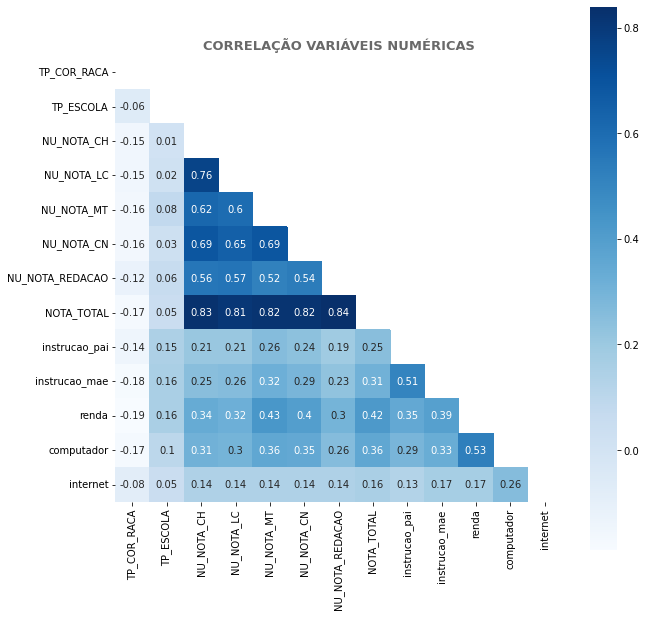

In [ ]:
plt.figure(figsize=(10, 10))


mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS NUMÉRICAS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)



#### CORRELAÇÃO - CARACTERÍSTICAS CANDIDATOS

In [ ]:
num_cat = df1[['TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ESCOLA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NOTA_TOTAL', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet']]

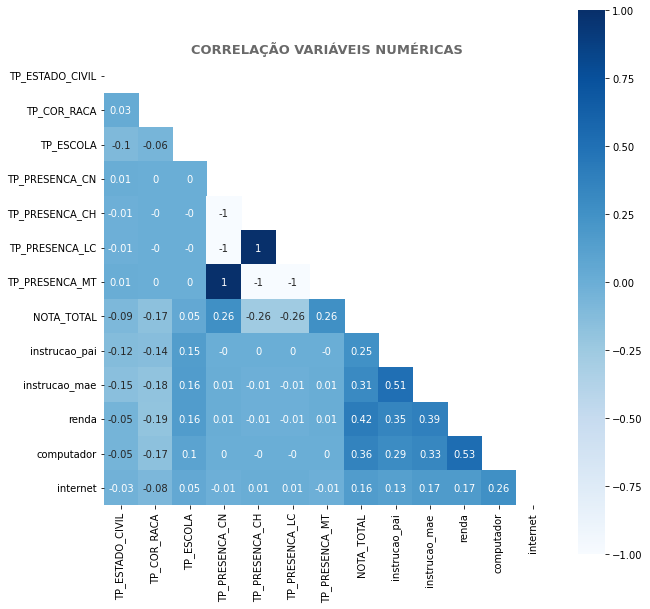

In [ ]:
cor_num_cat = num_cat.corr().round(2)

# Plotando gráfico
plt.figure(figsize=(10, 10))

mask = np.triu(np.ones_like(cor_num_cat, dtype=bool))
sns.heatmap(cor_num_cat, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS NUMÉRICAS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)



### ESTATÍSTICA DESCRITIVA

In [ ]:
df1.columns.values

array(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'TP_ST_CONCLUSAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NOTA_TOTAL', 'PRESENCA', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet'], dtype=object)

**CONCLUSÕES**

    Redação é a prova com maior desvio padrão, seguido por matemática
    Com exceção da redação, matematática foi a prova mais próxima da nota máxima

In [ ]:
# relembrando: df1 == alunos com presenca == 4

df1[['NU_IDADE', 'TP_ANO_CONCLUIU','NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'NOTA_TOTAL', 'instrucao_pai', 'instrucao_mae',
       'renda', 'computador', 'internet']].describe()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_TOTAL,instrucao_pai,instrucao_mae,renda,computador,internet
count,14606.000000,14606.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,19.930782,1.905381,497.629159,531.501632,542.207941,553.469353,598.114113,2718.448001,4.650281,4.741271,3559.380734,1.013419,1.913323
std,6.075363,3.387890,78.407938,79.586834,58.152032,114.972515,168.322353,427.883490,1.735302,1.537643,3977.282452,0.873959,0.281370
min,13.000000,0.000000,327.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,17.000000,0.000000,435.600000,479.425000,510.100000,458.025000,520.000000,2425.425000,3.000000,4.000000,998.000000,0.000000,2.000000
50%,18.000000,0.000000,495.600000,536.450000,548.050000,541.100000,600.000000,2698.200000,5.000000,5.000000,1996.000000,1.000000,2.000000
75%,20.000000,2.000000,556.075000,586.375000,581.500000,637.200000,700.000000,2998.375000,6.000000,6.000000,3992.000000,1.000000,2.000000
max,73.000000,13.000000,789.700000,791.800000,801.700000,971.900000,980.000000,4109.400000,8.000000,8.000000,19960.000000,4.000000,2.000000


**CONCLUSÕES**

    A medida que a renda aumenta, a média e a mediana das notas também aumentam.
    Também há menor outliers. A concentração das notas nas maiores rendas é maior,
    levando a hipótese de padronização do ensino (ensino mais nivelado entre os candidatos
    de maior renda)
    
    Nota-se também que nas menores rendas há maiores outliers, tanto para notas abaixo do 
    primeiro quartil como acima do Q3, caracterizando não padronização das notas.

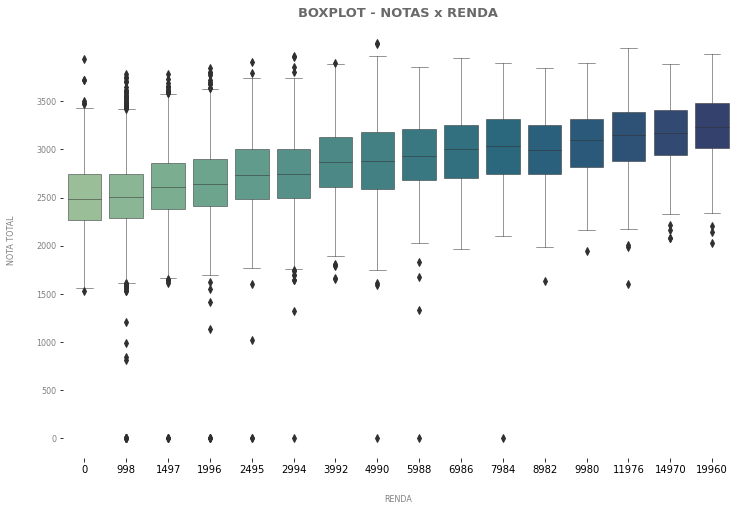

In [ ]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='renda', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - NOTAS x RENDA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)

**Conclusões**

    Quanto maior a instrução do pai, maior a nota do candidato.
    Os declarantes no grupo 8 ("não sei") se compara às notas dos grupos de menor renda

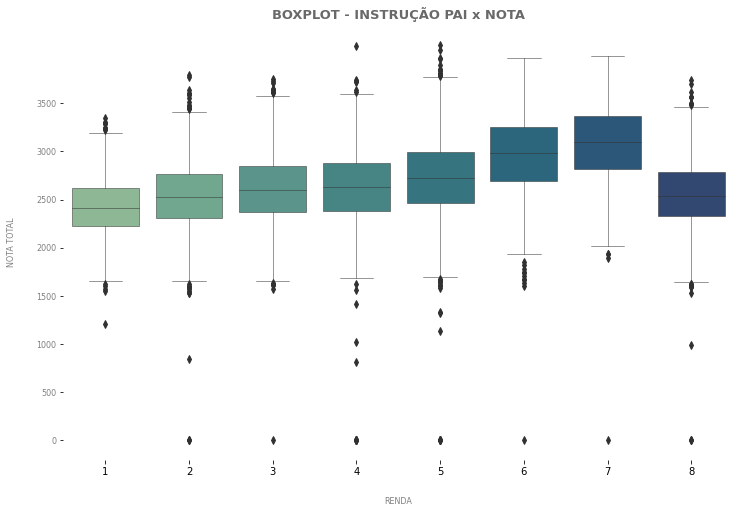

In [ ]:
s2 = plt.figure(figsize=(12,8))
s2 = sns.boxplot(x='instrucao_pai', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - INSTRUÇÃO PAI x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


**Conclusões**

    Alunos que não possuem internet em casa obtêm notas muito menores dos candidatos que possuem internet.
    Há mais outliers no grupo de candidatos que possuem internet em casa.
    
    A medida que a quantidade de computadores em casa aumentam, o desempenho também aumenta.

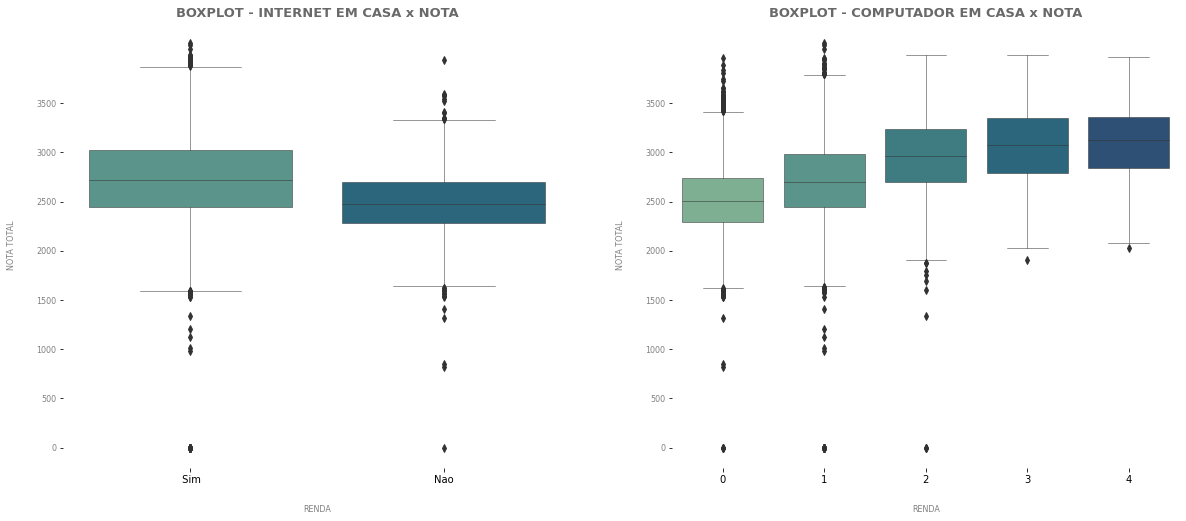

In [ ]:
internet = df1[['internet', 'NOTA_TOTAL']]
internet.replace(1, 'Nao', inplace = True)
internet.replace(2, ' Sim', inplace = True)

# Plot gráfico

s2 = plt.figure(figsize=(20,18))

plt.subplot(2, 2, 1)
s2 = sns.boxplot(x='internet', y ='NOTA_TOTAL', data = internet, palette = 'crest',
                linewidth = 0.5)


s2 = plt.title('BOXPLOT - INTERNET EM CASA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


####

## plot

plt.subplot(2, 2, 2)
s3 = sns.boxplot(x='computador', y ='NOTA_TOTAL', data = df1, palette = 'crest',
                linewidth = 0.5)


s3 = plt.title('BOXPLOT - COMPUTADOR EM CASA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


## ANÁLISES COMPLEMENTARES

Esta seção se propõe a analisar alguns dados complementares que embora não esteja diretamente ligado à renda do candidato (objeto desta análise exploratória de dados), está relacionado a questões sociais e de desigualdade.

#### NOTAS DAS CANDIDATAS DECLARANTES GRÁVIDAS OU LACTANTES

As candidatas que solicitaram atendimento especial para grávidas ou lactantes tendem a obter notas dentro da média dos candidatos.

Há poucos candidatos que solicitaram atendimento com nome social. A grande maioria deles tiraram notas dentro da média dos demais candidatos

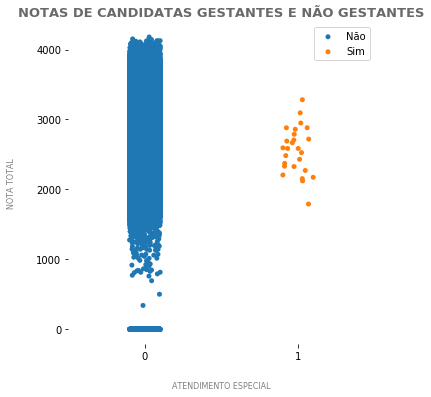

In [ ]:
s3 = sns.catplot(x='IN_GESTANTE', y = 'NOTA_TOTAL', data = df1)

s3 = plt.title('NOTAS DE CANDIDATAS GESTANTES E NÃO GESTANTES',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.xlabel('ATENDIMENTO ESPECIAL', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Não', 'Sim'])

####


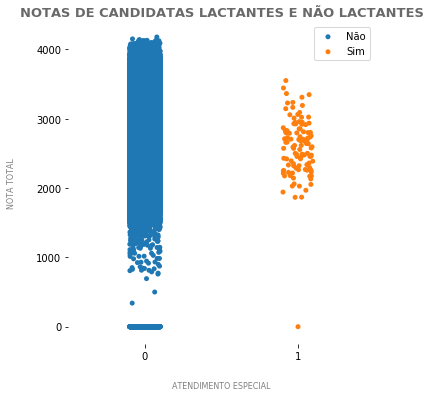

In [ ]:

s2 = sns.catplot(x='IN_LACTANTE', y = 'NOTA_TOTAL', data = df1)

s2 = plt.title('NOTAS DE CANDIDATAS LACTANTES E NÃO LACTANTES',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

s2 = plt.xlabel('ATENDIMENTO ESPECIAL', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=1, labels=['Não', 'Sim'])

#### NOTAS DE CANDIDATOS DE ACORDO COM A DECLARAÇÃO DA RAÇA

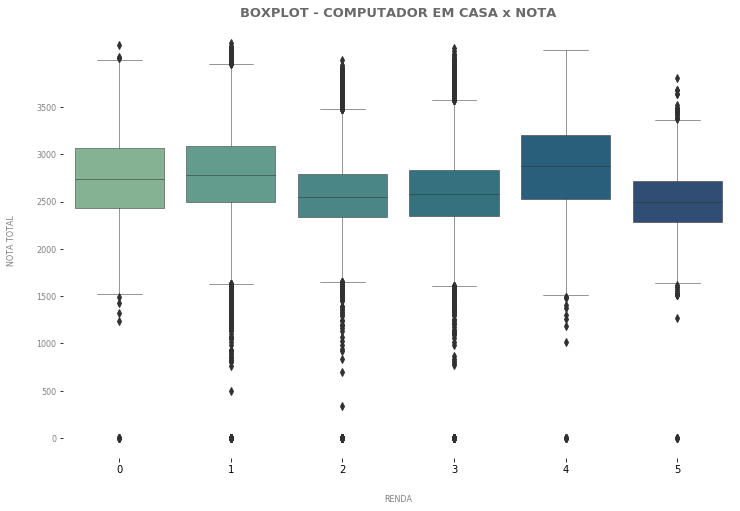

In [ ]:
raca = df1[['TP_COR_RACA', 'NOTA_TOTAL']]
#raca.replace(0, 'Nao_declarado', inplace = True)
#raca.replace(1, 'Branca', inplace = True)
#raca.replace(2, 'Preta', inplace = True)
#raca.replace(3, 'Parda', inplace = True)
#raca.replace(4, 'Amarela', inplace = True)
#raca.replace(5, 'Indígena', inplace = True)


plt.figure(figsize=(12, 8))
s3 = sns.boxplot(x='TP_COR_RACA', y ='NOTA_TOTAL', data = raca, palette = 'crest', 
                linewidth = 0.5)


s3 = plt.title('BOXPLOT - COMPUTADOR EM CASA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
s2 = y_ticks = np.arange(0, 4000, 500)
s2 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


#### NOTAS DE CANDIDATOS QUE SOLICITARAM ATENDIMENTO POR NOME SOCIAL

In [ ]:
df1['IN_NOME_SOCIAL'].value_counts()

0    581759
1        66
Name: IN_NOME_SOCIAL, dtype: int64

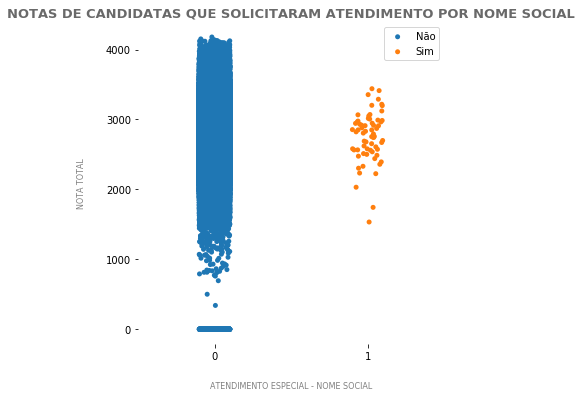

In [ ]:
nome_social = df1[['IN_NOME_SOCIAL', 'NOTA_TOTAL']]

s2 = sns.catplot(x='IN_NOME_SOCIAL', y = 'NOTA_TOTAL', data = nome_social)

s2 = plt.title('NOTAS DE CANDIDATAS QUE SOLICITARAM ATENDIMENTO POR NOME SOCIAL',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

s2 = plt.xlabel('ATENDIMENTO ESPECIAL - NOME SOCIAL', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend(loc=1, labels=['Não', 'Sim'])

## SELEÇÃO DE VARIÁVEIS

Com base na análise de correlação e na exploração dos dados, serão selecionadas as variáveis que possivelmente vão impactar mais o modelo de Machine Learning

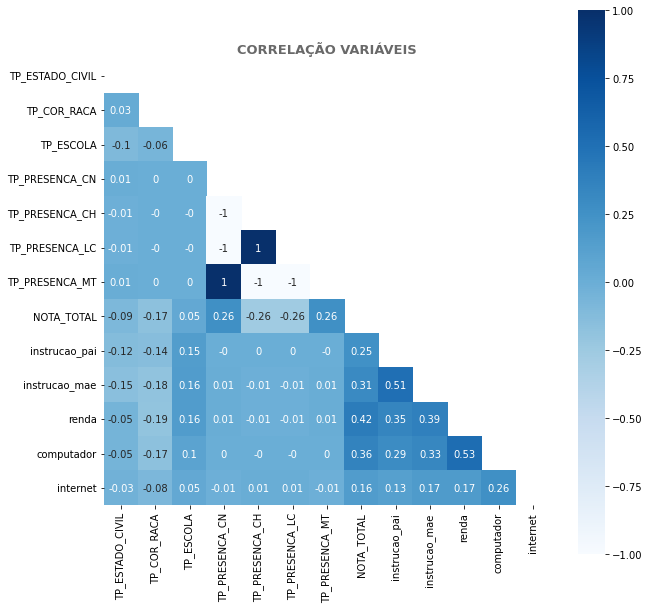

In [ ]:
df2 = num_cat.corr().round(2)

# Plotando gráfico
plt.figure(figsize=(10, 10))

mask = np.triu(np.ones_like(df2, dtype=bool))
sns.heatmap(df2, annot = True, square = True, mask = mask, cmap = 'Blues')

plt.title('CORRELAÇÃO VARIÁVEIS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

In [ ]:
var1 = df1[['renda', 'NOTA_TOTAL']]
var2 = df1[['instrucao_mae', 'NOTA_TOTAL']]
var3 = df1[['computador', 'NOTA_TOTAL']]
var4 = df1[['TP_COR_RACA', 'NOTA_TOTAL']]

var = df1[['renda', 'NOTA_TOTAL']]

## MACHINE LEARNING

Nesta seção será treinado o modelos de Machine Learning: KMeans a fim de tentar encontrar grupos semelhantes

https://diegonogare.net/2015/08/entendendo-como-funciona-o-algoritmo-de-cluster-k-means/

### ELBOW METHOD

In [ ]:
# Definição da quantidade de clusters
# (Será utilizadas as variaveis renda e nota_total e a qtdade encontrda será aplciada para as demais)

# Transformando as variáveis em um array
x1 = var1.values

In [ ]:
# Padronizando as variaveis

scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

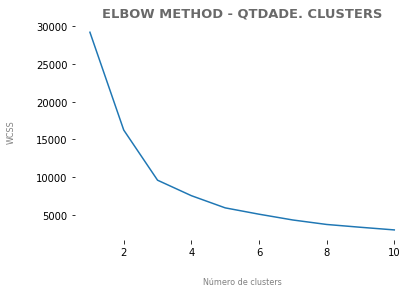

In [ ]:
# funcao para gerar elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    

# plotando o gráfico
s2 = plt.plot(range(1, 11), wcss)
s2 = plt.title('ELBOW METHOD - QTDADE. CLUSTERS',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.ylabel('WCSS', color = 'grey', labelpad = 20, fontsize = 8)

s2 = plt.xlabel('Número de clusters', color = 'grey', labelpad = 20, fontsize = 8)

### K-MEANS

#### RENDA X NOTA_TOTAL

**CONCLUSÃO**


Devido ao eixo X (renda) ser segmentado por grupos, isto é, um range, o cluster não traz muitas informações relevantes, entretanto, reafirma as hipóteses validadas na análise exploratória de dados.

No modelo, é possível notar que o grupo de candidatos com maior renda se concentra  nas notas mais altas.


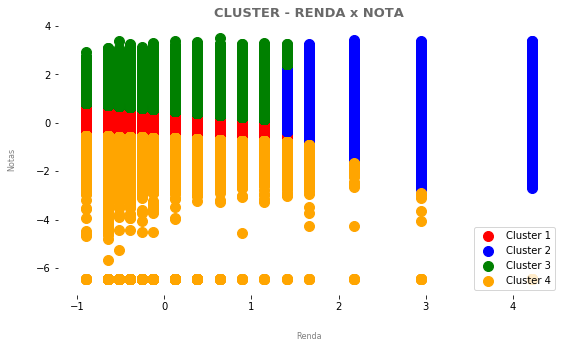

In [ ]:
# Treinando o modelo
kmeans = KMeans(n_clusters = 4, random_state = 0)
predict = kmeans.fit_predict(x1)

# Plotando o gráfico
plt.figure(figsize=(9, 5))
plt.scatter(x1[predict == 0, 0], x1[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[predict == 1, 0], x1[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[predict == 2, 0], x1[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x1[predict == 3, 0], x1[predict == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

# Configurando gráfico
plt.legend()
plt.xlabel('Renda', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('Notas', color = 'grey', labelpad = 20, fontsize = 8)
plt.title('CLUSTER - RENDA x NOTA',
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
s2 = sns.despine(bottom = True, left=True)


#CONCLUSÕES

**ANÁLISE EXPLORATÓRIA DE DADOS**

Por meio da análise exploratória de dados, foi possível formular algumas hipóteses, considerando-as verdadeiras.
    
Na seção de análises macros, foi possível identificar alguns aspectos gerais:
    
**1.** Os alunos tem maior quantidade de faltas no primeiro dia de prova

**2.** Os alunos tem maior eliminação no segundo dia de prova (redação - conforme g1)

**3.** Maior quantidade de candidatos do sexo feminino. Este número também é maior quando analisada a distribuição  proporcional de idade: Há mais mulheres entre os 20 e 30 anos prestando o ENEM do que homens

**4.** A maior parte dos candidatos terminaram o ensino médio há um ano. Há quantidade relevante nos candidatos que concluíram o ensino médio há mais de 13 anos.

**5.** A distribuição dos candidatos declarados pretos também está levemente mais distribuída quando comparado aos declarados brancos e pardos

**6.** Os declarados brancos estão concentrados nas idades mais jovens

**7.** Redação é a prova com menores notas, seguidas por matemática, ciências da natureza, ciências Humanas e por fim linguagens e códigos

*************************
*************************
*************************

**INVESTIGAÇÃO DAS HIPÓTESES**

Já na análise das hipóteses, foi possível concluir:

**1.** Candidatos do ensino público optam mais pelo idioma espanhol

**2.** 98% das candidatas que solicitaram atendimento presencial para gestantes ou lactantes e informaram o tipo de escola no ensino médio estudaram em escolas públicas (54 do ensino público e 1 do particular)

**3.** A renda do candidato tem forte impacto no seu desempenho. Quanto maior a renda, mais a curva se inclina para a direita (nas maiores notas)

**4.** Candidatos de maior renda tendem a faltar menos nas provas

**5.** A instrução dos pais têm forte impacto no desempenho dos candidatos. A mediana é cada vez maior quando comparado com o maior grau de instrução dos pais.

**6.** Candidatos autodeclarados amarelos pertencem ao grupo com melhores notas, quando separados pela raça.


*************************
*************************
*************************

**MACHINE LEARNING**

KMEANS

O algoritmo treinado foi de cluster: KMeans.
A visualização não forneceu informações novas e devido ao range da renda estar segmentado ( 0, 998, 1497...) o eixo X se apresentou separados por "colunas".
Mesmo a visualização do algoritmo não ser tão agradável, com ele foi possível reafirmar a hipótese levantada no estudo. Existem alunos com as menores rendas e melhores notas, porém, e possível visualizar o grupo de alunos com maior idade se concentrando nas melhores notas. 


*************************
*************************
*************************

**CONCLUSÕES FINAIS**

Embora a desigualdade social e seu impacto no desempenho dos candidatos do ENEM seja conhecida, foi possível visualizar em números e gráficos a diferença das notas finais obtidas.
Todas as variáveis socioeconômicas declaradas pelos candidatos mostram forte influência nas notas, como: renda, instrução dos pais, existencia de computador e acesso à internet em suas respectivas residências.
Fatores como idioma estrangeiro escolhido, idade e abstenção também se relacionam com a renda e a nota final dos candidatos.


É possível visualizar como a renda impacta diretamente o desempenho dos alunos no Exame Nacional do Ensino Médio